# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [66]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime

In [67]:
#read files
cast = pd.read_csv(r"C:\Users\jjgzz\OIM7502_F25\data\cast.csv")
release_dates = pd.read_csv(r"C:\Users\jjgzz\OIM7502_F25\data\release_dates.csv")
titles = pd.read_csv(r"C:\Users\jjgzz\OIM7502_F25\data\titles.csv")

In [68]:
#verify cast works
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [69]:
#verify release_dates works
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [70]:
#verify titles works
titles.head

<bound method NDFrame.head of                              title  year
0                  Ankara ekspresi  1952
1         Ans Vaterland, ans teure  1915
2                      Miss Mohini  2002
3                    La vera madre  1999
4                     O Amerikanos  1993
...                            ...   ...
226008                  Armageddon  1969
226009                Verit i znat  1986
226010                 Muukalainen  2008
226011  Byeolmyeongbuteun unjeonsa  1977
226012            Red Headed Woman  1932

[226013 rows x 2 columns]>

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [72]:
#size of datasets
print(cast.shape)
print(release_dates.shape)
print(titles.shape)

(3442902, 6)
(443486, 4)
(226013, 2)


In [73]:
#columns and datatypes
print(cast.info)
print(release_dates.info)
print(titles.info)

<bound method DataFrame.info of                                     title  year                         name  \
0                          Closet Monster  2015                     Buffy #1   
1                         Suuri illusioni  1985                       Homo $   
2                     Battle of the Sexes  2017                      $hutter   
3                    Secret in Their Eyes  2015                      $hutter   
4                              Steve Jobs  2015                      $hutter   
...                                   ...   ...                          ...   
3442897                           Foxtrot  1988            Lilja Þórisdóttir   
3442898  Niceland (Population. 1.000.002)  2004    Sigríður Jóna Þórisdóttir   
3442899                         Skammdegi  1985           Dalla Þórðardóttir   
3442900                      U.S.S.S.S...  2003  Kristín Andrea Þórðardóttir   
3442901                 Bye Bye Blue Bird  1999                 Rosa á Rógvu   

       

In [74]:
#missing values per dataset
print('There are 6 missing titles and 8 missing characters in cast, one missing title in Titles, one missing title in release dates')
print(cast.isna().sum(), 
      release_dates.isna().sum(),
      titles.isna().sum())

There are 6 missing titles and 8 missing characters in cast, one missing title in Titles, one missing title in release dates
title              6
year               0
name               0
type               0
character          8
n            1327783
dtype: int64 title      1
year       0
country    0
date       0
dtype: int64 title    1
year     0
dtype: int64


In [75]:
#setting up cutoff date
cutoff = 2025
cast = cast[cast["year"] <= cutoff]
release_dates = release_dates[release_dates["year"] <= cutoff]
titles = titles[titles["year"] <= cutoff]

print("Max year after filtering:")
print("cast.csv:", cast["year"].max())
print("release_dates.csv:", release_dates["year"].max())
print("titles.csv:", titles["year"].max())

Max year after filtering:
cast.csv: 2025
release_dates.csv: 2025
titles.csv: 2025


### 2. How many movies have the title North by Northwest

In [77]:
#counting how many titles, case insensitive
north_count = titles[titles["title"].str.lower() == "north by northwest".lower()].shape[0]
print('There is', north_count, 'movie called North by Northwest')

There is 1 movie called North by Northwest


### 3. How many version of Hamlet are there, when was the first made? the last?

In [79]:
hamlet = titles[titles["title"].str.lower() == "hamlet"]
hamlet_count = hamlet.shape[0]
first_hamlet = hamlet["year"].min()
last_hamlet = hamlet["year"].max()
print('There are', hamlet_count, 'movies named Hamlet, the first one was made in', first_hamlet, 'the last one was made in', last_hamlet)

There are 20 movies named Hamlet, the first one was made in 1910 the last one was made in 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [81]:
ti = titles[titles["title"].str.lower() == "treasure island"]
print("Below you'll see all releases of treasure island from oldest to newest.")
display(ti.sort_values("year"))

Below you'll see all releases of treasure island from oldest to newest.


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [83]:
#Figuring out movies made per year
comp_years = [1950, 1980, 2000]

for y in comp_years:
    count = titles[titles['year'] == y].shape[0]
    print(f"Movies released in {y}: {count}")
print("This can indicate several things which may be true at a time: The business got bigger, so more people are incentivized to make movies.")
print("At the same time, it may have become easier to make movies. For example, with the transition from digital to film, more portable cameras.")
print("You can even record a movie on an iPhone now.")
print("Looking at treasure island, there were more versions in the latter years. A lot of remakes. A lot of sequels.")

Movies released in 1950: 1109
Movies released in 1980: 1750
Movies released in 2000: 2568
This can indicate several things which may be true at a time: The business got bigger, so more people are incentivized to make movies.
At the same time, it may have become easier to make movies. For example, with the transition from digital to film, more portable cameras.
You can even record a movie on an iPhone now.
Looking at treasure island, there were more versions in the latter years. A lot of remakes. A lot of sequels.


### 6. How big was the cast of Metropolis


In [85]:
met_cast = cast[cast["title"].str.lower() == "metropolis"]
met_size = met_cast.shape[0]
print(f"Metropolis had a cast size of {met_size}")

Metropolis had a cast size of 33


### 7. How many roles for actors were there 1950's? 1990's

In [87]:
#one variable for each decade
fifties = cast[(cast["type"] == "actor") & (cast["year"].between(1950, 1959))]
nineties = cast[(cast["type"] == "actor") & (cast["year"].between(1990, 1999))]

fifties_count = fifties.shape[0]
nineties_count = nineties.shape[0]
print(f'There were {fifties_count} roles for actors in the 50s and {nineties_count} roles for actors in the 90s.')

There were 153559 roles for actors in the 50s and 245713 roles for actors in the 90s.


### 8. How many roles for actors & actresses over time? Output should be a line graph

In this and other graphs for this assignment, we see a dropoff in 2025, as the dataset is limited in this year
Sad to see that roles will go more often towards actors, but they historically have had more work.
The shape on both lines is similar so there's a high correlation.


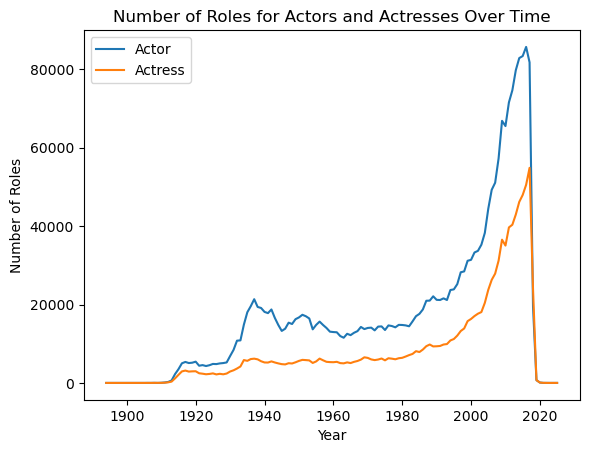

In [89]:
#creating plotline with matplotlib
#first with the roles per year variable, sorted by actor and actress
# first actors
roles_per_year = (cast[cast["type"].isin(["actor","actress"])].groupby(["year", "type"]).size().reset_index(name="count"))

r_actors = roles_per_year[roles_per_year["type"] == "actor"]
r_actresses = roles_per_year[roles_per_year["type"] == "actress"]

# Plotting
plt.plot(r_actors["year"], r_actors["count"], label="Actor")
plt.plot(r_actresses["year"], r_actresses["count"], label="Actress")

# Labels and title
print('In this and other graphs for this assignment, we see a dropoff in 2025, as the dataset is limited in this year')
print("Sad to see that roles will go more often towards actors, but they historically have had more work.")
print("The shape on both lines is similar so there's a high correlation.")
plt.xlabel("Year")
plt.ylabel("Number of Roles")
plt.title("Number of Roles for Actors and Actresses Over Time")
plt.legend()
plt.show()


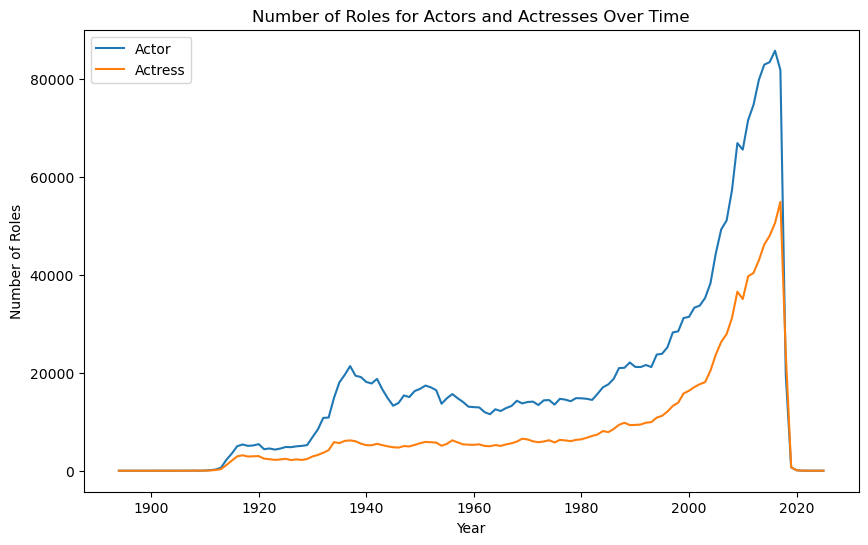

In [90]:
# Group by year and category, count roles
roles_per_year = (
    cast[cast["type"].isin(["actor", "actress"])]
    .groupby(["year", "type"])
    .size()
    .reset_index(name="count")
)

# Plot
plt.figure(figsize=(10, 6))

#  actors
actors = roles_per_year[roles_per_year["type"] == "actor"]
plt.plot(actors["year"], actors["count"], label="Actor")

#  actresses
actresses = roles_per_year[roles_per_year["type"] == "actress"]
plt.plot(actresses["year"], actresses["count"], label="Actress")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Roles")
plt.title("Number of Roles for Actors and Actresses Over Time")
plt.legend()
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [92]:
#filtering out for roles with only top billing
#top billing is usually the first 2 or 3, so let's say 3 at most per movie
leading_2000s = cast[
    (cast["year"].between(2000, 2009)) & 
    (cast["n"] <= 3)
]

num_leading_2000s = leading_2000s.shape[0]
print(f"In the 2000s there were {num_leading_2000s} leading roles")

In the 2000s there were 66569 leading roles


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [94]:
#similar as the above, we need to find the ones with na's starting with 50's
no_rank_1950s = cast[
    (cast["year"].between(1950, 1959)) & 
    (cast["n"].isna())
]

# roles with no ranking in the 2000s
no_rank_2000s = cast[
    (cast["year"].between(2000, 2009)) & 
    (cast["n"].isna())
]

# Count
count_no_rank_1950s = no_rank_1950s.shape[0]
count_no_rank_2000s = no_rank_2000s.shape[0]

print(f"Number of roles with no ranking in the 1950s: {count_no_rank_1950s}")
print(f"Number of roles with no ranking in the 2000s: {count_no_rank_2000s}")
print("The biggest reason is possibly the simple growth of the industry. I'd be interested in seeing the proportion of roles to box office.")
print("Actor unions have been around for a while and they usually fight for billing rights.")

Number of roles with no ranking in the 1950s: 95406
Number of roles with no ranking in the 2000s: 232037
The biggest reason is possibly the simple growth of the industry. I'd be interested in seeing the proportion of roles to box office.
Actor unions have been around for a while and they usually fight for billing rights.


### 11. Plot the number of films made in each decade

C:\Users\jjgzz\AppData\Local\Temp\ipykernel_38416\2077320267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles["decade"] = titles["year"] // 10 * 10


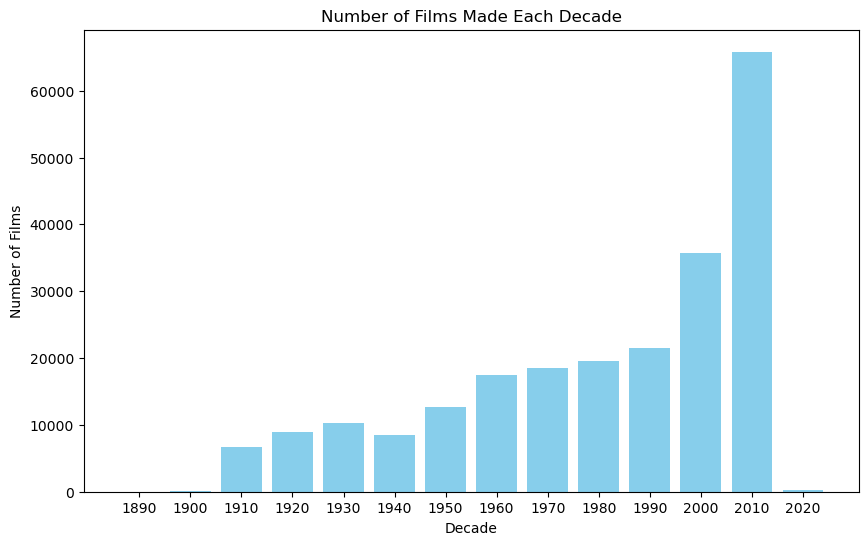

In [96]:
# Create a decade column using floor division
titles["decade"] = titles["year"] // 10 * 10

# Group by decade and count movies
films_per_decade = titles.groupby("decade").size().reset_index(name="count")

# Plot as histogram
plt.figure(figsize=(10, 6))
plt.bar(films_per_decade["decade"], films_per_decade["count"], width=8, color="skyblue")
plt.xlabel("Decade")
plt.ylabel("Number of Films")
plt.title("Number of Films Made Each Decade")
plt.xticks(films_per_decade["decade"])
plt.show()

### 12. Plot the number of films with a Rustler character over time

Below you will see a chart with the number of films with a rustler character over time. Grouped by title, sans duplicates, then by years.
It seems that this is correlated with the golden age of Westerns. We may see much fewer of these now.


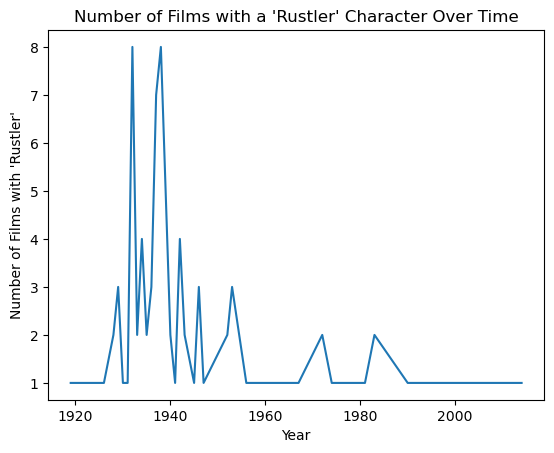

In [98]:

# Filter for rows where the character contains 'Rustler' (case-insensitive)
rustler_roles = cast[cast["character"].str.contains("Rustler", case=False, na=False)]

#avoiding double counting films
rustler_films = rustler_roles[["year", "title"]].drop_duplicates()

# grouped by year
rustler_per_year = rustler_films.groupby("year").size().reset_index(name="count")

print('Below you will see a chart with the number of films with a rustler character over time. Grouped by title, sans duplicates, then by years.')
print('It seems that this is correlated with the golden age of Westerns. We may see much fewer of these now.')
plt.plot(rustler_per_year["year"], rustler_per_year["count"], linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Films with 'Rustler'")
plt.title("Number of Films with a 'Rustler' Character Over Time")
plt.show()

### 13. What are the top ten character names of all time?

In [100]:
top_char = cast['character'].value_counts().head(10)
print('Below is the list of top character names. It seems a lot of actors are not billed with a named role, rather, they play generic parts.')
print(top_char)

Below is the list of top character names. It seems a lot of actors are not billed with a named role, rather, they play generic parts.
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [102]:
#filter for 90's cast
cast_1990s = cast[cast["year"].between(1990, 1999)]

#filter for actors
actors_1990s = cast_1990s[cast_1990s["type"] == "actor"]

#count the individual actors
actor_counts = (
    actors_1990s.groupby("name")["title"]
    .nunique()  # counts unique films per actor
    .sort_values(ascending=False)
)

print('Below you will see the actor with the most roles in the 1990s, with an impressive 130 roles.')
actor_counts.head(1)

Below you will see the actor with the most roles in the 1990s, with an impressive 130 roles.


name
Shakti Kapoor    130
Name: title, dtype: int64

### 15. What are the top 10 roles that start with Science?

In [104]:
science = cast[cast["character"].str.startswith("Science", na=False)]

# Count the occurrences of each role
top_science = science["character"].value_counts().head(10)
print(f'The top 10 roles that begin with Science are displayed below: {top_science}')

The top 10 roles that begin with Science are displayed below: character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [106]:
#same as others, by cast size
cast_counts = cast.groupby("title").size().reset_index(name="cast_size")

# Find the film(s) with the largest cast
largest_cast_film = cast_counts[cast_counts["cast_size"] == cast_counts["cast_size"].max()]
print("The film with the largest cast size and cast size are listed below.")
largest_cast_film

The film with the largest cast size and cast size are listed below.


,title,cast_size
11315,Around the World in 80 Days,1364


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [108]:
#As we have a variable for cast counts, we can just describe it
print("It seems we have an average cast count of 20, standard deviation of 24. Since we can't have negatives, the upper limits are larger.")
print("Smallest cast is of one, so every movie has at least one person in it. No unmanned films to speak of.")
print("50th percentile being at 13 is interesting, as it's half of the 75th percentile.")
print("Meaning, movies with cast counts in the hundreds or thousands are outliers. Most may be under 50.")
cast_counts.describe()

It seems we have an average cast count of 20, standard deviation of 24. Since we can't have negatives, the upper limits are larger.
Smallest cast is of one, so every movie has at least one person in it. No unmanned films to speak of.
50th percentile being at 13 is interesting, as it's half of the 75th percentile.
Meaning, movies with cast counts in the hundreds or thousands are outliers. Most may be under 50.


,cast_size
count,168253.000000
mean,20.462595
std,24.206697
min,1.000000
25%,6.000000
50%,13.000000
75%,26.000000
max,1364.000000


### 18. How many films has Natalie Portman been in in each year throughout her career?

In [110]:
#counting natalies
portman_roles = cast[cast["name"].str.lower() == "natalie portman"]

# unique films per year
portman_fpy = (
    portman_roles.groupby("year")["title"]
    .nunique()
    .reset_index(name="num_films")
)

#She's had some busy periods, pretty consistent career all in all. Loved her debut in Leon. fpy - films per year
portman_fpy

,year,num_films
0,1995,1
1,1996,3
2,1999,2
3,2000,1
4,2001,1
5,2002,1
6,2003,1
7,2004,2
8,2005,4
9,2006,1


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [155]:
#filter the past variable for top billing roles not NA
portman_lead = portman_roles[(portman_roles["n"].notna()) & (portman_roles["n"] <= 2)]

#similar as in other past functions this assignment, leads per year
portman_lpy = (
    portman_lead.groupby("year")["title"]
    .nunique()
    .reset_index(name="num_films")
)

print("Only 6 years in which she didn't get top billing. Great trajectory")
portman_lpy

Only 6 years in which she didn't get top billing. Great trajectory


,year,num_films
0,1999,1
1,2000,1
2,2002,1
3,2005,3
4,2006,1
5,2007,1
6,2008,1
7,2009,1
8,2010,1
9,2011,2


### 20. Determine how many roles for actor or actress by decade. Plot the output 

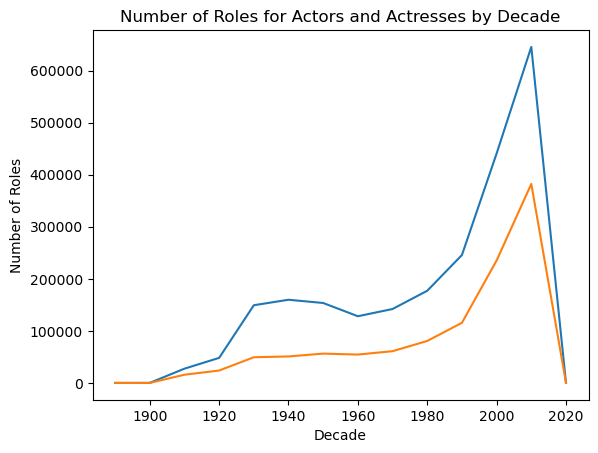

In [114]:
#filter for actors, actresses
roles = cast[cast["type"].isin(["actor", "actress"])]

#floor division
roles["decade"] = (roles["year"] // 10) * 10

#group by decade
roles_per_decade = roles.groupby(["decade", "type"]).size().reset_index(name="count")

plt.figure()
for type in ["actor", "actress"]:
    subset = roles_per_decade[roles_per_decade["type"] == type]
    plt.plot(subset["decade"], subset["count"], linestyle="-", label=type.capitalize())

plt.xlabel("Decade")
plt.ylabel("Number of Roles")
plt.title("Number of Roles for Actors and Actresses by Decade")
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [116]:
#date to datetime
release_dates["date"] = pd.to_datetime(release_dates["date"], errors="coerce")

# filter out rows with missing or future dats
release_dates = release_dates[release_dates["date"].dt.year <= 2025]

# Extract day of the week and month
release_dates["weekday"] = release_dates["date"].dt.day_name()
release_dates["month"] = release_dates["date"].dt.month_name()

# Pivot table: count of movies by weekday
weekday_counts = pd.pivot_table(
    release_dates, 
    index="weekday", 
    values="title", 
    aggfunc="count"
).sort_values("title", ascending=False)

print("We see below that many movies are released on Thursday or Friday. More are released on other days than I would have expected.")
weekday_counts

We see below that many movies are released on Thursday or Friday. More are released on other days than I would have expected.


,title
weekday,
Friday,163174
Thursday,125746
Wednesday,53439
Monday,37209
Saturday,31331
Tuesday,16762
Sunday,15823


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

By resetting the index, we can properly show the scale of releases by day of the week


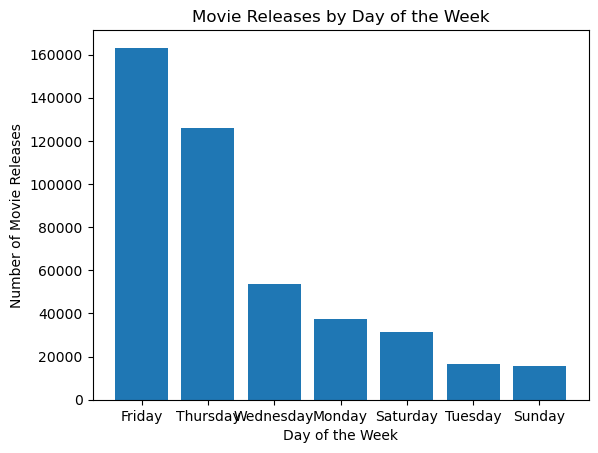

In [118]:
# Reset index
weekday_reset = weekday_counts.reset_index()

# Plot using 'weekday' on x-axis and count on y-axis
print("By resetting the index, we can properly show the scale of releases by day of the week")
plt.figure()
plt.bar(weekday_reset["weekday"], weekday_reset["title"])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Movie Releases")
plt.title("Movie Releases by Day of the Week")
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [120]:
#identify actors in star wars
sw_cast = cast[cast["title"].str.contains("Star Wars", case=False, na=False)]["name"].unique()

#find the other films
other_films = cast[cast["name"].isin(sw_cast)]

#exclude star wars
other_films = other_films[~other_films["title"].str.contains("Star Wars", case=False, na=False)]

#group by title, year, remove duplicates
other_films_unique = other_films[["title", "year"]].drop_duplicates().sort_values("year")

output_path = r"C:\Users\jjgzz\OIM7502_F25\data\star_wars_other_films.csv"
other_films_unique.to_csv(output_path, index = False)

print("Though I would like to show you the full list, the list is too big.")
print("So many people have appeared in Star Wars, some with long and prolific careers, such as Sir Christopher Lee,")
print("It would be an insane undertaking to store them all. Therefore, you have this variable, and I'll export this to a csv for your perusal.")
other_films_unique

Though I would like to show you the full list, the list is too big.
So many people have appeared in Star Wars, some with long and prolific careers, such as Sir Christopher Lee,
It would be an insane undertaking to store them all. Therefore, you have this variable, and I'll export this to a csv for your perusal.


,title,year
1902637,Caste,1930
1902649,Little Miss Nobody,1933
1902641,Get Your Man,1934
1902658,The Way of Youth,1934
821960,Evensong,1934
...,...,...
3166655,Chaos Walking,2019
2681415,The Rhythm Section,2019
2742341,Godzilla: King of Monsters,2019
684060,Untitled Indiana Jones Project,2020
